In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Project\\Modular_programming\\ML_modelling\\data\\gene.csv")
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

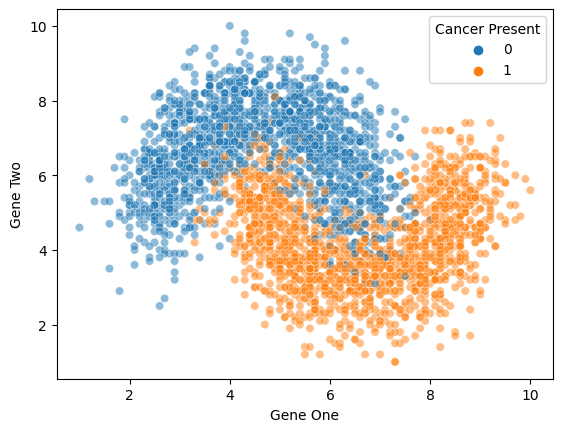

In [3]:
sns.scatterplot(data = df, x="Gene One", y="Gene Two", hue="Cancer Present", alpha=0.5)

(4.0, 8.0)

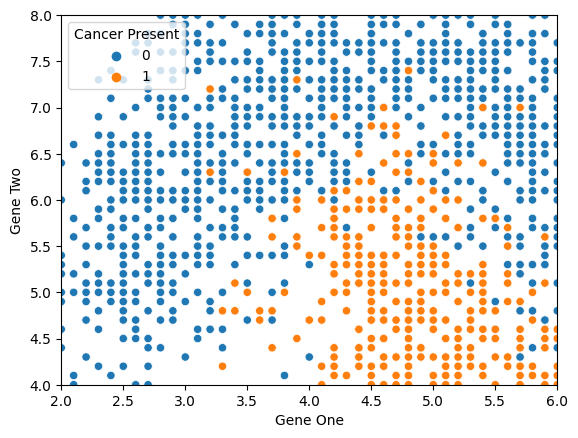

In [4]:
sns.scatterplot(data=df, x="Gene One", y="Gene Two", hue="Cancer Present")
plt.xlim(2,6)
plt.ylim(4,8)

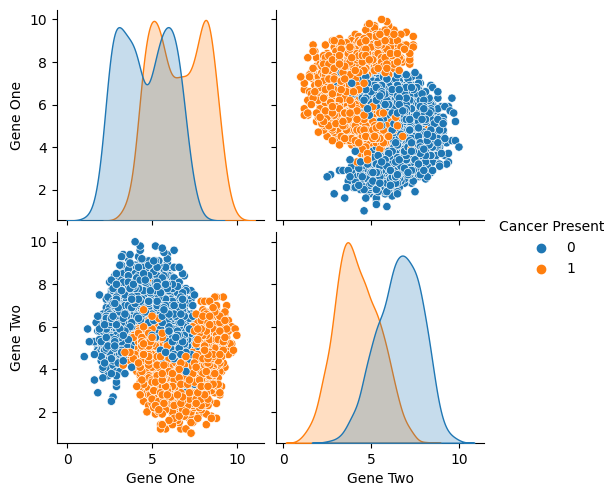

In [7]:
sns.pairplot(df, hue="Cancer Present")

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
y = df['Cancer Present']
x = df.drop('Cancer Present', axis =1 )

In [11]:
scaler = StandardScaler()


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state=101)

In [19]:
scaled_x_train = scaler.fit_transform(x_train)

In [20]:
scaled_x_test = scaler.transform(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier()

In [23]:
model.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = model.predict(scaled_x_test)
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], d

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(y_test, y_pred)

array([[124,  12],
       [ 12, 152]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       136
           1       0.93      0.93      0.93       164

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [33]:
df["Cancer Present"].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [34]:
from sklearn.metrics import accuracy_score

# choosing value of k for knn 

In [40]:
test_error_rates = []
for i in range(1,30):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(scaled_x_train, y_train)
    y_pred_t = model.predict(scaled_x_test)
    test_error = 1-accuracy_score(y_pred_t, y_test)
    test_error_rates.append(test_error)
test_error_rates

[0.09333333333333338,
 0.10999999999999999,
 0.08666666666666667,
 0.09333333333333338,
 0.07999999999999996,
 0.07999999999999996,
 0.08333333333333337,
 0.07666666666666666,
 0.08999999999999997,
 0.08333333333333337,
 0.08333333333333337,
 0.09333333333333338,
 0.09333333333333338,
 0.08666666666666667,
 0.07999999999999996,
 0.07999999999999996,
 0.07666666666666666,
 0.07999999999999996,
 0.07333333333333336,
 0.07666666666666666,
 0.07333333333333336,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336,
 0.07333333333333336]

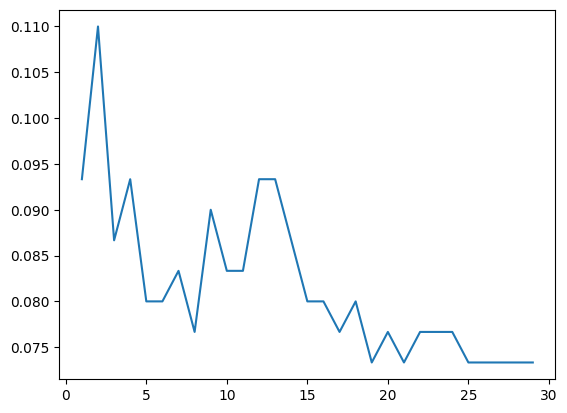

In [41]:
plt.plot(range(1,30), test_error_rates)

In [43]:
operation = [('scaler', scaler), ('knn', model)]

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipe = Pipeline(operation)

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
k_values = list(range(1,20))

In [58]:
parag_grid = {'knn__n_neighbors': k_values, "knn__metric": ['euclidean']}

In [59]:
full_cv_classifier = GridSearchCV(pipe, parag_grid, cv = 5, scoring = "accuracy" )

In [60]:
full_cv_classifier.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=29))]),
             param_grid={'knn__metric': ['euclidean'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [61]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

In [62]:
full_pred = full_cv_classifier.predict(x_test)

In [63]:
print(classification_report(y_test, full_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       136
           1       0.92      0.91      0.92       164

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

